In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import lob_for_futures as lobFut
from lob_for_futures import *
import os
import matplotlib.pyplot as plt


from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import pickle
import datetime as dt
from datetime import timedelta
import glob
import fathon
from fathon import fathonUtils as fu

import pyinform as pyinf
import pingouin as pig
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
import time
dataFolder = lobFut.dataFolder
quotes =[f for f in os.listdir(dataFolder) if str('_quotes') in f]
trades =[f for f in os.listdir(dataFolder) if str('_trades') in f]

symbolIdx = 4
symbols = [f.split("_")[0] for f in quotes]

symbol = sorted(symbols)[symbolIdx]
print(symbol)
quotesFileCh = os.path.join(dataFolder, quotes[symbolIdx])
tradesFileCh = os.path.join(dataFolder, trades[symbolIdx])

# get common Dates
quotesDates = sorted([f.split(".csv")[0] for f in os.listdir(quotesFileCh)])
tradesDates = sorted([f.split(".csv")[0] for f in os.listdir(tradesFileCh)])
intersectionDates = list(set(quotesDates).intersection(tradesDates))

trades_cols = ['size', 'time', 'type', 'value']



JB1


In [51]:
experimentsDestination = '/media/ak/T7/MFDFA Experiments'

In [43]:


if __name__ == '__main__':
    # params i need for fathon
    winSizes = fu.linRangeByStep(5, 60)
    revSeg = True
    polOrd = 3
    # load all teh dataframes at once with this
    start = time.time()
    print(start)
    # go through all the dataframes and take out n, f and h, h_ intercept
    # somehow one list comprehension blows up in memory
    n_f_values_dict = dict()
    h_dict = dict()

    symbolIdx = 4

    symbol = sorted(symbols)[symbolIdx]
    print(symbol)
    quotesFileCh = os.path.join(dataFolder, quotes[symbolIdx])
    tradesFileCh = os.path.join(dataFolder, trades[symbolIdx])

    # get common Dates
    quotesDates = sorted([f.split(".csv")[0] for f in os.listdir(quotesFileCh)])
    tradesDates = sorted([f.split(".csv")[0] for f in os.listdir(tradesFileCh)])
    intersectionDates = list(set(quotesDates).intersection(tradesDates))

    trades_cols = ['size', 'time', 'type', 'value']

    # params for the clocks

    calendar_resample_freq = "600S"
    trade_volume_width = 200
    ticks_width = 200
    usd_volume_width = 200
    dates_choice = intersectionDates[0:3]

    testClass = DataLoader(data_location=dataFolder,
                           symbol=symbol,
                           dates=dates_choice,
                           use_columns=trades_cols,
                           calendar_resample=calendar_resample_freq,
                           trade_volume_width=trade_volume_width,
                           ticks_width=ticks_width,
                           usd_volume_width=usd_volume_width)

    hash_of_file = "_".join(
        (str(symbol), "volume_width", str(trade_volume_width), "calendar_resample", str(calendar_resample_freq)))

    # load data
    input_dict = testClass.load_and_format_data()

    tick_bar_dfs = []
    volume_bar_dfs = []
    usd_volume_bar_dfs = []
    calendar_bar_dfs = []
    dates = list(input_dict.keys())
    





2021-10-09 21:38:43,805 DataLoader  INFO Loading data for:20180517
2021-10-09 21:38:43,917 DataLoader  INFO Loading data for:20180508
2021-10-09 21:38:43,997 DataLoader  INFO Loading data for:20180713


1633811923.7999465
JB1
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


In [62]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file

In [44]:
bar_returns = dict()
for date in dates:
        df = testClass.load_and_format_data()[str(date)]
        input_dict = testClass.get_bars(df)
        tick_bar_df = testClass.get_concat_data(testClass._bars_dict)['tick_bars']
        volume_bar_df = testClass.get_concat_data(testClass._bars_dict)['volume_bars']
        usd_volume_bar_df = testClass.get_concat_data(testClass._bars_dict)['usd_volume_bars']
        calendar_bar_df = testClass.get_concat_data(testClass._bars_dict)['calendar_bars']
        vr = returns(volume_bar_df.micro_price_close).replace([np.inf, -np.inf], 0)  # volume
        tr = returns(tick_bar_df.micro_price_close).replace([np.inf, -np.inf], 0)  # tick
        dr = returns(usd_volume_bar_df.micro_price_close).dropna().replace([np.inf, -np.inf], 0)  # usd volume
        df_ret = returns(calendar_bar_df.micro_price_close).dropna().replace([np.inf, -np.inf], 0)  # calendar
        bar_returns[date] = {'tick':tr,
                       'volume': vr,
                       'dollar': dr,
                       'calendar': df_ret}



2021-10-09 21:38:44,091 DataLoader  INFO Loading data for:20180517
2021-10-09 21:38:44,180 DataLoader  INFO Loading data for:20180508
2021-10-09 21:38:44,260 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-09 21:38:44,340 DataLoader  INFO Calculating calendar clock
2021-10-09 21:38:44,581 DataLoader  INFO Calculating volume clock
2021-10-09 21:38:45,376 DataLoader  INFO Calculating tick clock
2021-10-09 21:38:45,517 DataLoader  INFO Calculating usd volume clock
2021-10-09 21:38:57,828 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-09 21:38:58,062 DataLoader  INFO Loading data for:20180508
2021-10-09 21:38:58,137 DataLoader  INFO Loading data for:20180713
2021-10-09 21:38:58,209 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-09 21:38:58,503 DataLoader  INFO Calculating volume clock
2021-10-09 21:38:59,164 DataLoader  INFO Calculating tick clock
2021-10-09 21:38:59,308 DataLoader  INFO Calculating usd volume clock
2021-10-09 21:39:11,088 DataLoader  INFO Loading data for:20180517
2021-10-09 21:39:11,166 DataLoader  INFO Loading data for:20180508
2021-10-09 21:39:11,238 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-09 21:39:11,309 DataLoader  INFO Calculating calendar clock
2021-10-09 21:39:11,518 DataLoader  INFO Calculating volume clock
2021-10-09 21:39:12,120 DataLoader  INFO Calculating tick clock
2021-10-09 21:39:12,241 DataLoader  INFO Calculating usd volume clock


In [45]:
import itertools


In [41]:
bar_returns['20180517'].keys()

dict_keys(['tick', 'volume', 'dollar', 'calendar'])

In [111]:
dict_dfa = defaultdict(dict)
H_dict = defaultdict(dict)
for i, j in itertools.product(['tick', 'volume', 'dollar', 'calendar'], dates):
    data = (bar_returns[j][i])
    a = fu.toAggregated(np.asanyarray(data))
    pydfa = fathon.DFA(a)
    n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
    dict_dfa[j][i] = dict(zip(n, F))  # dictionary to match all the n and F values

    H, H_intercept = pydfa.fitFlucVec()  # same for H values
    H_dict[j][i] = [H, H_intercept]

    print('for date',j,' and bar type',i, 'you get',H)
    
    


for date 20180517  and bar type tick you get 0.5279805409537836
for date 20180508  and bar type tick you get 0.6302299600096248
for date 20180713  and bar type tick you get 0.6104167446766932
for date 20180517  and bar type volume you get 0.36691157227240523
for date 20180508  and bar type volume you get 0.513846853247188
for date 20180713  and bar type volume you get 0.5023295006245058
for date 20180517  and bar type dollar you get 0.4910002524659871
for date 20180508  and bar type dollar you get 0.5105304581151281
for date 20180713  and bar type dollar you get 0.5172171061818513
for date 20180517  and bar type calendar you get 0.4686757122666645
for date 20180508  and bar type calendar you get 0.6673803521778631
for date 20180713  and bar type calendar you get 0.613032939212193


tick


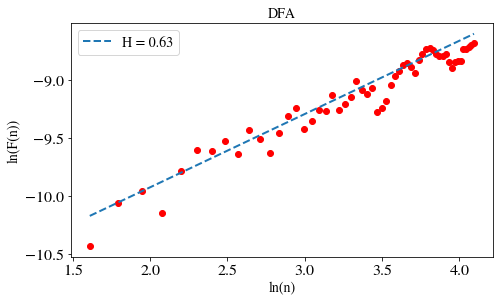

volume


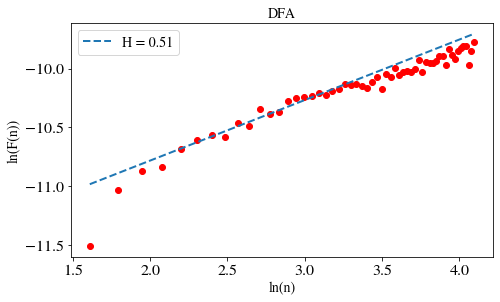

dollar


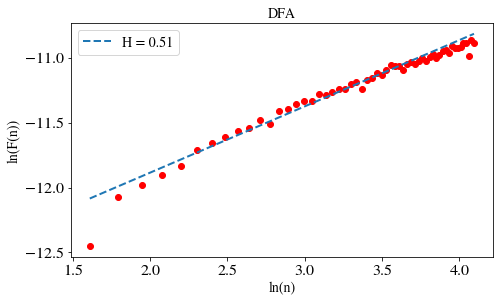

calendar


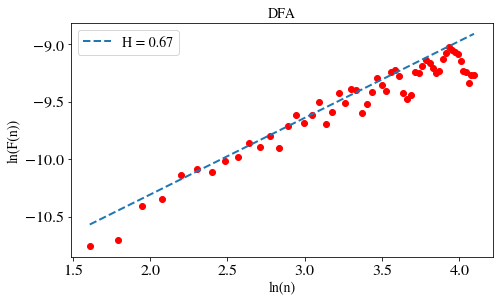

In [118]:
bars = ['tick', 'volume', 'dollar', 'calendar']
dict_dfa.keys()
df = pd.DataFrame.from_dict(dict_dfa[dates[2]])
for bar in bars:
    print(bar)

    F_choice = df[str(bar)]
    H, H_intercept = H_dict[dates[1]][str(bar)]
    plt.plot(np.log(n), np.log(F_choice), 'ro')
    plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H))
    plt.xlabel('ln(n)', fontsize=14)
    plt.ylabel('ln(F(n))', fontsize=14)
    plt.title('DFA', fontsize=14)
    plt.legend(loc=0, fontsize=14)
    plt.show()


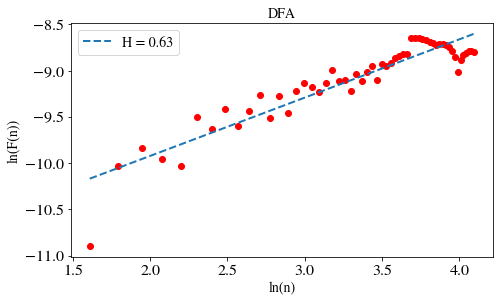

In [114]:
plt.plot(np.log(n), np.log(F_choice), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)

In [71]:
pkl_files = dict()
for idx, file in enumerate(files):
    file_path = os.path.join(path, file)
    pkl_files[idx] =  open_pickle_filepath(file_path) 

In [105]:
n

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60], dtype=int32)

In [75]:
example_dict =open_pickle_filepath('/media/ak/T7/MFDFA Experiments/JB1/DFA_n_f_values_bar_calendar_20180713.pkl')

In [77]:
keys = list(example_dict.keys())

In [89]:
df =pd.DataFrame.from_dict(example_dict[keys[1]])
bar_types =list(df.columns.values)
n = df.index.values

In [95]:

F

array([1.84458808e-05, 4.40209669e-05, 5.37404967e-05, 4.75188664e-05,
       4.40879580e-05, 7.43525960e-05, 6.55099715e-05, 8.14176762e-05,
       6.78312343e-05, 7.94319135e-05, 9.46570720e-05, 7.37563653e-05,
       9.37230283e-05, 7.80720579e-05, 9.94755986e-05, 1.07885922e-04,
       1.03720524e-04, 9.83538116e-05, 1.07626294e-04, 1.24415989e-04,
       1.10781042e-04, 1.11266692e-04, 9.90731539e-05, 1.19120498e-04,
       1.10101972e-04, 1.22131556e-04, 1.30134796e-04, 1.11319220e-04,
       1.32072638e-04, 1.30362225e-04, 1.33715464e-04, 1.41124543e-04,
       1.44998563e-04, 1.47388231e-04, 1.48269865e-04, 1.75947177e-04,
       1.74955131e-04, 1.74634252e-04, 1.73484303e-04, 1.71709913e-04,
       1.68859001e-04, 1.66475007e-04, 1.63355371e-04, 1.64374192e-04,
       1.64701288e-04, 1.62830127e-04, 1.59731919e-04, 1.53228124e-04,
       1.43499583e-04, 1.21851789e-04, 1.38010548e-04, 1.46045849e-04,
       1.49206269e-04, 1.51881918e-04, 1.52269643e-04, 1.51346541e-04])

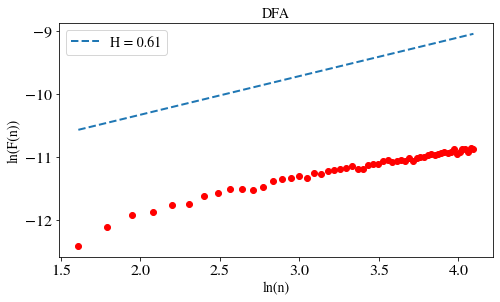

In [98]:
F = df[bar_types[2]].values
plt.plot(np.log(n), np.log(F), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)